# Feature Scaling

Standardization and Normalization

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.select_dtypes(include='object').columns

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

In [8]:
df2 = df[['survived', 'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [10]:
df3 = df2.fillna(df2.mean())

In [11]:
df3

,survived,pclass,age,parch
0,0,3,22.000000,0
1,1,1,38.000000,0
2,1,3,26.000000,0
3,1,1,35.000000,0
4,0,3,35.000000,0
...,...,...,...,...
886,0,2,27.000000,0
887,1,1,19.000000,0
888,0,3,29.699118,2
889,1,1,26.000000,0


In [13]:
X = df3.drop("survived", axis=1)
Y = df3["survived"]
print("Shape of X", X.shape)
print("Shape of Y", Y.shape)

Shape of X (891, 3)
Shape of Y (891,)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=51)
print("Shape of X Train", X_train.shape)
print("Shape of X Test", X_test.shape)
print("Shape of Y Train", Y_train.shape)
print("Shape of Y Test", Y_test.shape)

Shape of X Train (712, 3)
Shape of X Test (179, 3)
Shape of Y Train (712,)
Shape of Y Test (179,)


In [16]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [18]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [19]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [22]:
X_train_sc = sc.transform(X_train)
X_test_sc  = sc.transform(X_test)

C:\Users\Dips\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dips\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
X_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [24]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns= [ "pclass", "age", "parch"])
X_test_sc_df = pd.DataFrame(X_test_sc, columns= [ "pclass", "age", "parch"])

In [25]:
X_train_sc_df.head()

,pclass,age,parch
0,-1.75838,-2.307763,-1.109689
1,-1.75838,-2.121132,-1.109689
2,-1.75838,-2.384785,-1.109689
3,-1.75838,-2.343312,-1.109689
4,-1.75838,-2.273997,2.043036


In [26]:
X_train_sc_df.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,-2.732253,-2.274856,-0.491985
std,1.185586,0.077027,1.256415
min,-4.565658,-2.447470,-1.109689
25%,-3.512929,-2.319613,-1.109689
50%,-1.758380,-2.273997,-1.109689
75%,-1.758380,-2.242590,-1.109689
max,-1.758380,-2.029298,6.772123


In [ ]:
mmc = MinMaxScaler()

In [28]:
mmc.fit(X_train)

MinMaxScaler()

In [29]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc  = mmc.transform(X_test)

In [30]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [31]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns= [ "pclass", "age", "parch"])
X_test_mmc = pd.DataFrame(X_test_mmc, columns= [ "pclass", "age", "parch"])

In [33]:
X_train_df = pd.DataFrame(X_train)

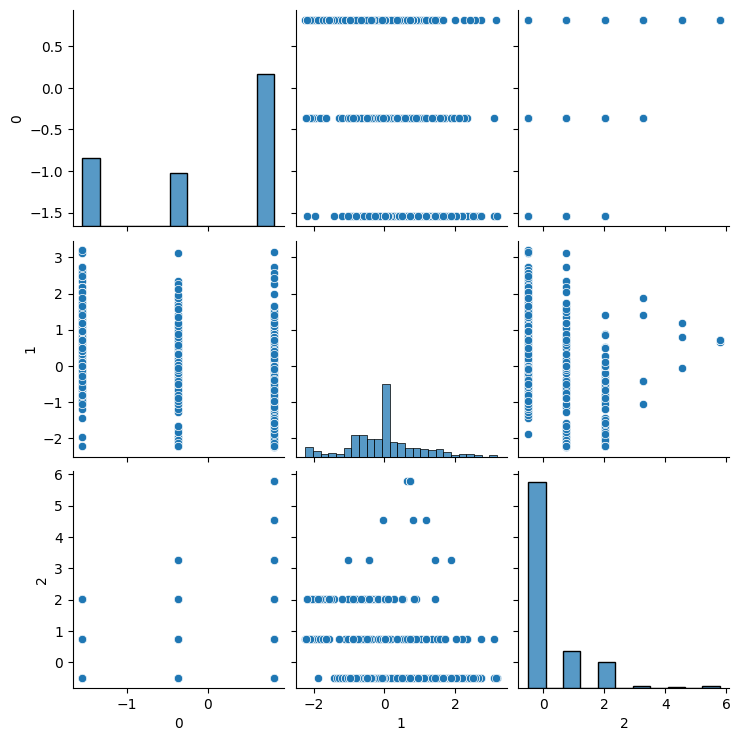

In [34]:
sns.pairplot(X_train_df)

In [36]:
import matplotlib.pyplot as plt

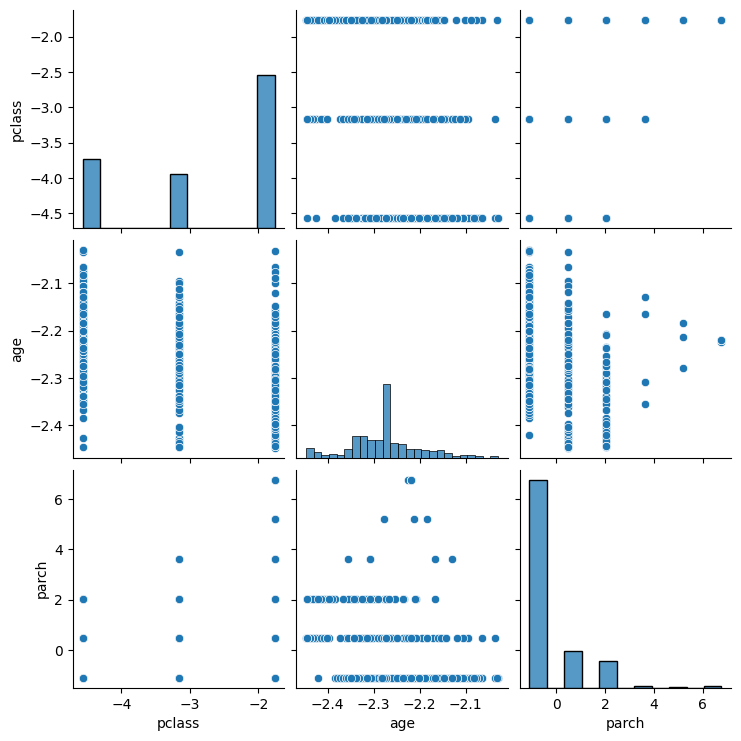

In [37]:
sns.pairplot(X_train_sc_df)
plt.show()

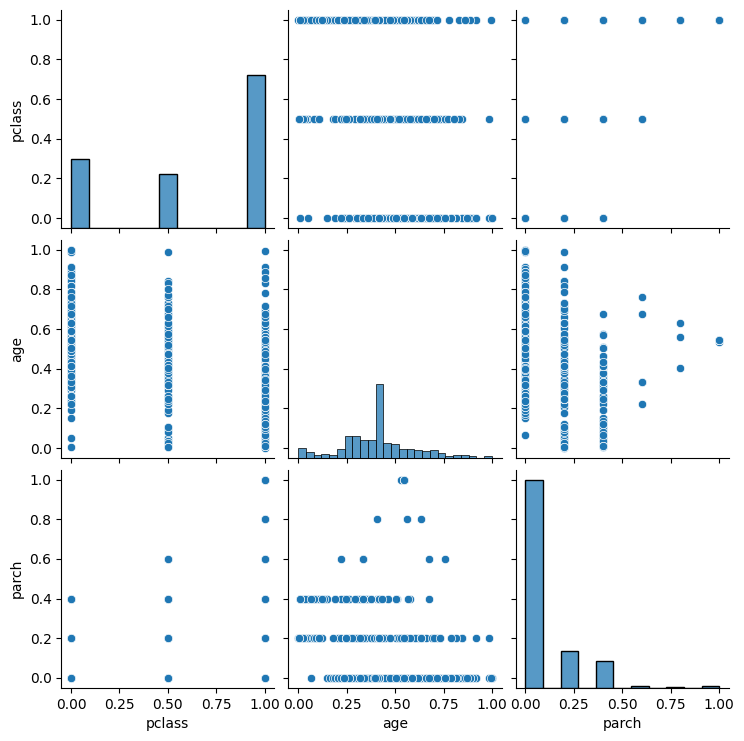

In [39]:
sns.pairplot(X_train_mmc)
plt.show()